<a href="https://colab.research.google.com/github/Saifullah785/Python_for_Data_Science/blob/main/Pandas_For_Data_Science/class_08_date_and_time_in_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd

Timestamp Object

Time stamps refrence particular moments in time(e.g, oct24th, 2022 at 7.00pm)

# **Creating Timestamp objects**

In [4]:
# creating a timestamp
type(pd.Timestamp('2025-06-01'))

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# variations
pd.Timestamp('2025/06/01')
pd.Timestamp('2025, 06, 01')

Timestamp('2025-06-01 00:00:00')

In [8]:
# only year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [9]:
# using text
pd.Timestamp('5th january 2025')

Timestamp('2025-01-05 00:00:00')

In [11]:
# providing time also

pd.Timestamp('2025-06-01 07:00:00PM')


Timestamp('2025-06-01 19:00:00')

In [15]:
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2025, 6, 1, 7, 0, 0))
x

Timestamp('2025-06-01 07:00:00')

In [20]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

0

syntax wise datetime is very convenient

but the performance takes a hit while working with huge data.List vs Numpy Array

The weaknesses of Python's datetme formate inspired the numpy team to add a set of native time series data type to Numpy

the datetime 64 dtype encodes dates as 64 bit integers and thus allows arrays of dates to be represented very compactly

In [21]:
import numpy as np
date = np.array('2025-06-01', dtype=np.datetime64)
date

array('2025-06-01', dtype='datetime64[D]')

In [22]:
date + np.arange(12)

array(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
       '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
       '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

# DatetimeIndex Object

A collection of pandas timestamp

In [23]:
# from strings
pd.DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03'])

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03'], dtype='datetime64[ns]', freq=None)

In [24]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2025, 6, 1), dt.datetime(2025, 6, 2), dt.datetime(2025, 6, 3)])

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03'], dtype='datetime64[ns]', freq=None)

In [25]:
# using pd.timestamps
pd.DatetimeIndex([pd.Timestamp(2025, 6, 1), pd.Timestamp(2025, 6, 2), pd.Timestamp(2025, 6, 3)])

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03'], dtype='datetime64[ns]', freq=None)

In [26]:
# using datatimeindex as series index
pd.Series(range(3), index=pd.DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03']))

,0
2025-06-01,0
2025-06-02,1
2025-06-03,2


# **date_rang function**

In [27]:
# generate daily dates in a given range
pd.date_range(start='2025-06-01', end='2025-06-30', freq='D')

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# alternate days in a given range
pd.date_range(start='2025-06-01', end='2025-06-30', freq='3D')

DatetimeIndex(['2025-06-01', '2025-06-04', '2025-06-07', '2025-06-10',
               '2025-06-13', '2025-06-16', '2025-06-19', '2025-06-22',
               '2025-06-25', '2025-06-28'],
              dtype='datetime64[ns]', freq='3D')

In [31]:
# B -> business days
pd.date_range(start='2025-06-01', end='2025-06-30', freq='B')

DatetimeIndex(['2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05',
               '2025-06-06', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13', '2025-06-16', '2025-06-17',
               '2025-06-18', '2025-06-19', '2025-06-20', '2025-06-23',
               '2025-06-24', '2025-06-25', '2025-06-26', '2025-06-27',
               '2025-06-30'],
              dtype='datetime64[ns]', freq='B')

In [33]:
# W -> one week per day
pd.date_range(start='2025-06-01', end='2025-06-30', freq='W-SUN')

DatetimeIndex(['2025-06-01', '2025-06-08', '2025-06-15', '2025-06-22',
               '2025-06-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [35]:
# H -> Hourly data (factor)
pd.date_range(start='2025-06-01', end='2025-06-30', freq='6H')

<ipython-input-35-0fbed49a2a1e>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2025-06-01', end='2025-06-30', freq='6H')


DatetimeIndex(['2025-06-01 00:00:00', '2025-06-01 06:00:00',
               '2025-06-01 12:00:00', '2025-06-01 18:00:00',
               '2025-06-02 00:00:00', '2025-06-02 06:00:00',
               '2025-06-02 12:00:00', '2025-06-02 18:00:00',
               '2025-06-03 00:00:00', '2025-06-03 06:00:00',
               ...
               '2025-06-27 18:00:00', '2025-06-28 00:00:00',
               '2025-06-28 06:00:00', '2025-06-28 12:00:00',
               '2025-06-28 18:00:00', '2025-06-29 00:00:00',
               '2025-06-29 06:00:00', '2025-06-29 12:00:00',
               '2025-06-29 18:00:00', '2025-06-30 00:00:00'],
              dtype='datetime64[ns]', length=117, freq='6h')

In [36]:
# M -> Month end
pd.date_range(start='2025-06-01', end='2025-06-30', freq='M')

<ipython-input-36-9bbf1f752ac8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2025-06-01', end='2025-06-30', freq='M')


DatetimeIndex(['2025-06-30'], dtype='datetime64[ns]', freq='ME')

In [37]:
# MS -> Month Start
pd.date_range(start='2025-06-01', end='2025-06-30', freq='MS')

DatetimeIndex(['2025-06-01'], dtype='datetime64[ns]', freq='MS')

In [39]:
# A -> Year end
pd.date_range(start='2025-06-01', end='2030-06-30', freq='A')

<ipython-input-39-3cb15572431a>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2025-06-01', end='2030-06-30', freq='A')


DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [43]:
# using  period (number of results)
pd.date_range(start='2025-06-01', periods=25, freq='M')

<ipython-input-43-3c140f389cf9>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2025-06-01', periods=25, freq='M')


DatetimeIndex(['2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30',
               '2025-10-31', '2025-11-30', '2025-12-31', '2026-01-31',
               '2026-02-28', '2026-03-31', '2026-04-30', '2026-05-31',
               '2026-06-30', '2026-07-31', '2026-08-31', '2026-09-30',
               '2026-10-31', '2026-11-30', '2026-12-31', '2027-01-31',
               '2027-02-28', '2027-03-31', '2027-04-30', '2027-05-31',
               '2027-06-30'],
              dtype='datetime64[ns]', freq='ME')

to_datetime_function

convert an existing objects to pandas timestamp/datetimeindex object

In [50]:
# simple series example

s= pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

,0
0,Sunday
1,Saturday
2,Friday


In [55]:
# with errors
s= pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s, errors='coerce').dt.day_name()


,0
0,Sunday
1,Saturday
2,NaN


In [56]:
df = pd.read_csv('/content/expense_data.csv')

In [57]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [60]:
df['Date'] = pd.to_datetime(df['Date'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


dt accessor

Accessor object for datetimelike properties of the Series values.

In [62]:
df['Date'].dt.is_quarter_start

,Date
0,False
1,False
2,False
3,False
4,False
...,...
272,False
273,False
274,False
275,False


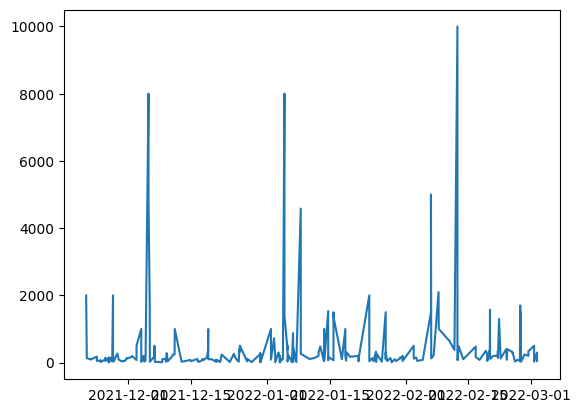

In [63]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Amount'])
plt.show()

<Axes: xlabel='day_name'>

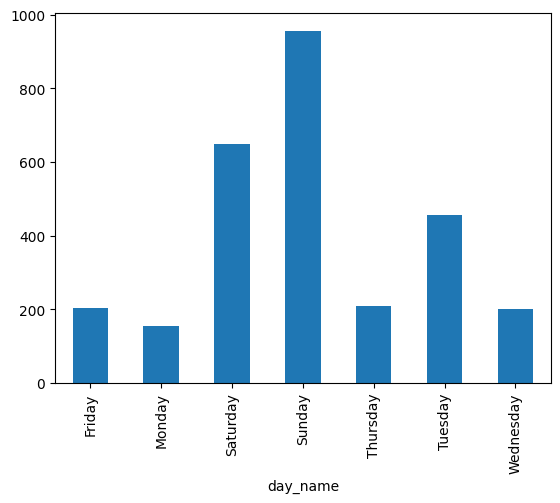

In [72]:
# day name wise bar chart/month wise bar chart
df['day_name'] = df['Date'].dt.day_name()
df.groupby('day_name')['Amount'].mean().plot(kind='bar')
# df['Date'].dt.day_name().value_counts().plot(kind='bar')

In [67]:
df['month_name'] = df['Date'].dt.month_name()

In [68]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

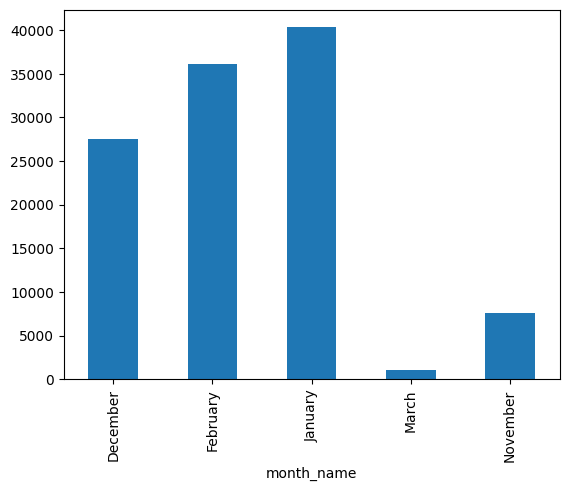

In [75]:
# month wise bar chart
df.groupby('month_name')['Amount'].sum().plot(kind='bar')

In [74]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
